By: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning

### Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)
%cd /content/drive/My Drive/Applied 2020 Şubat/datasets

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Applied 2020 Şubat/datasets


In [0]:
!ls

creditcard.csv	       german_credit_data.csv  RovitDatasetBig_.zip  spam.csv
data_hand_pose.pickle  heart.csv	       RovitDataset.zip      Wine.csv


In [0]:
from matplotlib import pyplot as plt

In [0]:
import pandas as pd
with open('heart.csv') as f:
    df = pd.read_csv(f, sep = ',') 

print(df.shape)
df.iloc[:4]


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [0]:
for col in df:
  print(col)
  

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


### Distributions According to Features


Age

<BarContainer object of 41 artists>

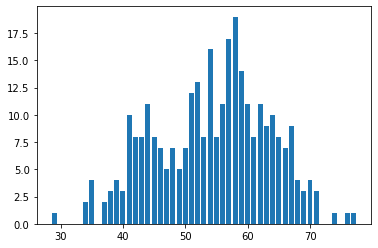

In [0]:
plt.bar(df.age.value_counts().keys(),df.age.value_counts().values)

Gender

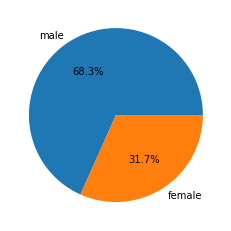

In [0]:
gendercounts=df.sex.value_counts().values
plt.pie(x= gendercounts, labels=['male','female'], autopct='%1.1f%%')
None

Chest Pain Type

[0, 2, 1, 3] [143, 87, 50, 23]


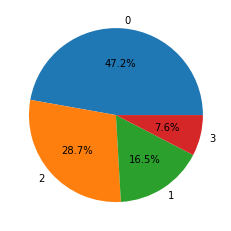

In [0]:
labels = list(df.cp.value_counts().keys())
values = list(df.cp.value_counts().values)
print(labels, values)


plt.pie(x= values, labels=labels, autopct='%1.1f%%')
None

Heart Disease: Positive or Negative

[1, 0] [165, 138]


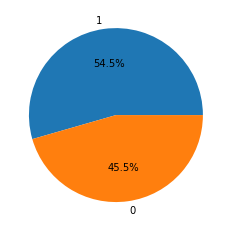

In [0]:
labels = list(df.target.value_counts().keys())
values = list(df.target.value_counts().values)
print(labels, values)


plt.pie(x= values, labels=labels, autopct='%1.1f%%')
None

###Crosstabs

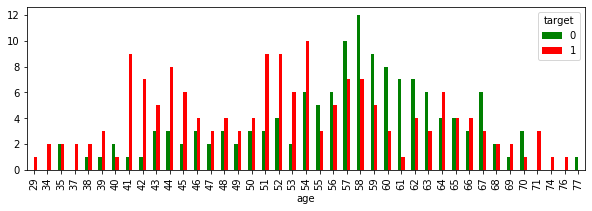

In [0]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(10,3), color = ['g','r'])

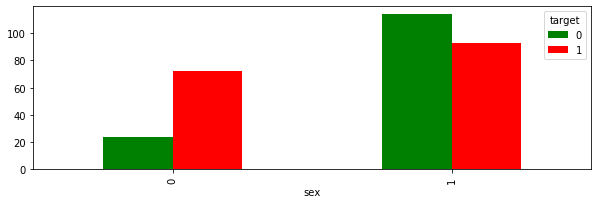

In [0]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,3), color = ['g','r'])

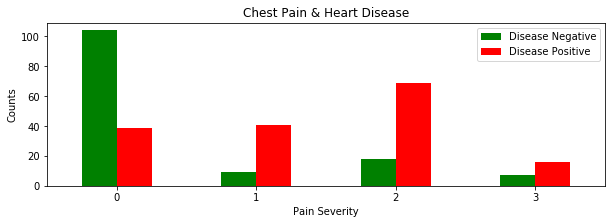

In [0]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,3), color = ['g','r'])
plt.title('Chest Pain & Heart Disease')
plt.xlabel('Pain Severity')
plt.ylabel('Counts')
plt.legend(["Disease Negative", "Disease Positive"])
plt.xticks(rotation=0)
plt.show()


### Inspecting Distributions on Two & Three Dim Space


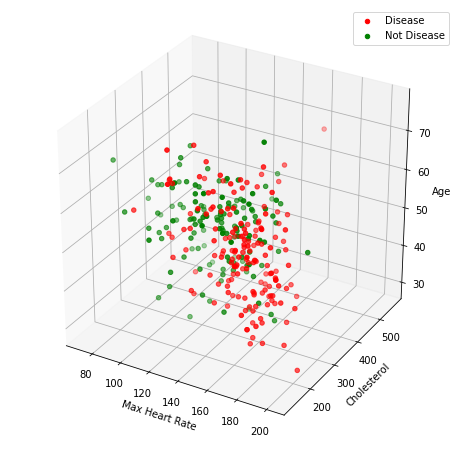

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df.thalach[df.target==1], ys=df.chol[(df.target==1)], zs=df.age[(df.target==1)], c='red')
ax.scatter(xs=df.thalach[df.target==0], ys=df.chol[(df.target==0)], zs=df.age[(df.target==0)], c='green')
ax.legend(["Disease", "Not Disease"])

ax.set_xlabel('Max Heart Rate')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Age')

plt.show()

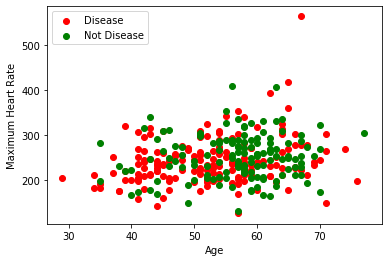

In [0]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Preprocessing

In [0]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [0]:
inputs = df.drop(['target'],axis=1)
labels = df.target.values

Normalization

In [0]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

inputs = normalize(inputs, axis = 0)
pd.DataFrame(inputs).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.065665,0.069505,0.062734,0.053193,0.149071,0.000000,0.056923,0.000000,0.084860,0.0,0.000000,0.000000,0.000000,0.208514,0.0,0.235702,0.000000,0.0,0.218218,0.0,0.000000
1,0.038565,0.069505,0.056244,0.057074,0.000000,0.077152,0.070964,0.000000,0.129135,0.0,0.000000,0.000000,0.107211,0.000000,0.0,0.000000,0.077615,0.0,0.218218,0.0,0.000000
2,0.042734,0.000000,0.056244,0.046572,0.000000,0.000000,0.065272,0.000000,0.051654,0.0,0.000000,0.141421,0.000000,0.000000,0.0,0.000000,0.077615,0.0,0.000000,0.0,0.083918
3,0.058369,0.069505,0.051918,0.053878,0.000000,0.077152,0.067549,0.000000,0.029516,0.0,0.000000,0.141421,0.000000,0.000000,0.0,0.000000,0.077615,0.0,0.000000,0.0,0.083918
4,0.059411,0.000000,0.051918,0.080816,0.000000,0.077152,0.061857,0.100504,0.022137,0.0,0.083624,0.000000,0.000000,0.000000,0.0,0.000000,0.077615,0.0,0.000000,0.0,0.083918


In [0]:
x_train, x_test, y_train, y_test = train_test_split(inputs,labels,test_size = 0.2,random_state=0)

###Models

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 81.97%


K - Nearest Neighbour

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("K = {} Accuracy: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

K = 2 Accuracy: 78.69%


Best K Value

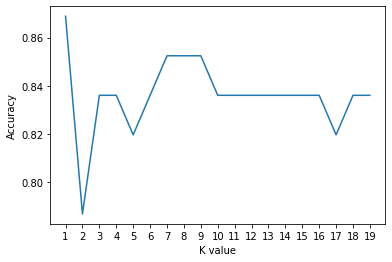

Maximum KNN Score is 86.89%


In [0]:
import numpy as np
accList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(x_train, y_train)
    accList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), accList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

acc = max(accList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

SVM

In [0]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy: {:.2f}%".format(acc))

Test Accuracy: 86.89%


Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Test Accuracy: {:.2f}%".format(acc))

Test Accuracy: 86.89%


Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.05%


Random Forest

In [0]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


###Compare

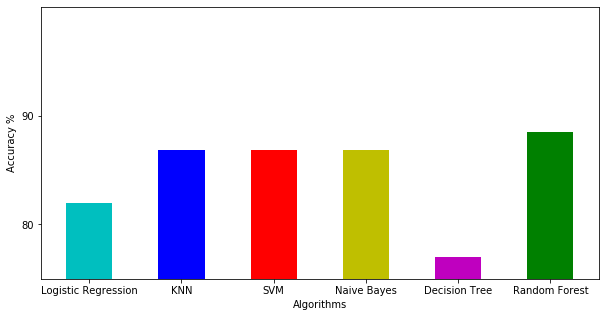

In [0]:
colors = ['c','b','r','y','m','g']

plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(x=accuracies.keys(), height=list(accuracies.values()),width=0.5,color=colors)
plt.ylim([75,100])
plt.show()

In [0]:
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

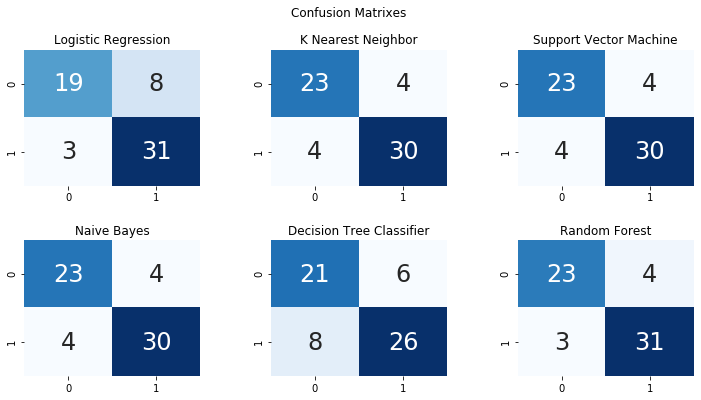

In [0]:
import seaborn as sns
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=12)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbor")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()